## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
sns.set()
np.set_printoptions(threshold = sys.maxsize)

## Import Dataset

In [2]:
dataset = pd.read_excel("Train_dataset.xlsx")
dataset.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.29,12765.84,32.38,45.35,1208599.0,5.05,-0.43,0.0520,1.0,0.61,9.20,156.987852
1,AA2,NYSE,Information Tech,214.52,12765.84,33.25,170.56,13753356.0,3.10,0.23,0.0164,1.0,NaN,6.91,560.859622
2,AA3,NYSE,Information Tech,943.42,12765.84,88.27,143.58,6892003.0,7.70,0.23,0.0396,1.0,NaN,6.09,1279.732874
3,AA4,BSE,Materials,828.13,38182.08,73.66,151.76,8316793.0,4.80,0.03,0.0431,74.9,1.11,5.60,1121.787632
4,AA5,S&P 500,Real Estate,NaN,3351.28,23.79,NaN,3943312.0,8.06,-0.43,0.0244,1.0,1.07,9.46,382.962534


## Check nan

In [3]:
print(dataset.isna().any())

Stock Index             False
Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
Stock Price             False
dtype: bool


## Droping Stock Index from string to int

In [4]:
dataset = dataset.drop(['Stock Index'], axis = 1)

## Creating independent and dependent variable

In [5]:
x = dataset.iloc[ : , : -1].values
y = dataset.iloc[ : , -1].values

## Creating train-test split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1, random_state = 0)

## Simple Imputer

In [7]:
from sklearn.impute import SimpleImputer
imputer_train = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer_train.fit(x_train[ : , 2 :])
x_train[ : , 2 :] = imputer_train.transform(x_train[ : , 2 :])

imputer_valid = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer_valid.fit(x_valid[ : , 2 :])
x_valid[ : , 2 :] = imputer_valid.transform(x_valid[ : , 2 :])

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
standard_scaler_train = StandardScaler()
x_train[ : , 2 : ] = np.array(standard_scaler_train.fit_transform(x_train[ : , 2 : ]))

standard_scaler_valid = StandardScaler()
x_valid[ : , 2 : ] = np.array(standard_scaler_valid.fit_transform(x_valid[ : , 2 : ]))

## One Hot Enocding Categorical Variables

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_transformer_train = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1])],
                                             remainder = 'passthrough')
x_train = np.array(column_transformer_train.fit_transform(x_train))

column_transformer_valid = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1])],
                                             remainder = 'passthrough')
x_valid = np.array(column_transformer_valid.fit_transform(x_valid))


## Creating Gradient Boosting Regression Model

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
regressor_gb = GradientBoostingRegressor(loss = 'huber',
                                         n_estimators = 100,
                                         random_state = 42)
regressor_gb.fit(x_train, y_train)
y_pred_gb = regressor_gb.predict(x_train)

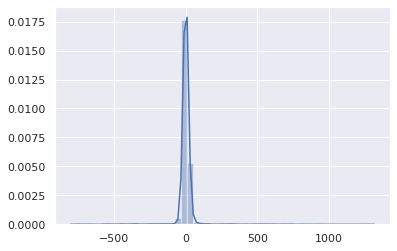

In [54]:
residuals = y_train - y_pred_gb
sns.distplot(residuals)

In [55]:
rms_gb = np.sqrt(np.mean(np.power((np.array(y_train)-np.array(y_pred_gb)),2)))
print(rms_gb)
ms_gb = np.sum(np.power((np.array(y_train)-np.array(y_pred_gb)), 2))/len(y_train)
print(ms_gb)

72.37756208667771
5238.511493610887


50.656031649727616
2566.033542498206


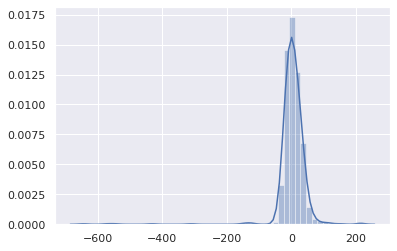

In [56]:
y_pred_valid_gb = regressor_gb.predict(x_valid)
residuals_valid = y_valid - y_pred_valid_gb
sns.distplot(residuals_valid)
rms_valid_gb = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(y_pred_valid_gb)),2)))
print(rms_valid_gb)
ms_valid_gb = np.sum(np.power((np.array(y_valid)-np.array(y_pred_valid_gb)), 2))/len(y_valid)
print(ms_valid_gb)

## Test set data preprocessing

In [57]:
test_set = pd.read_excel("Test_dataset.xlsx")

In [58]:
stock_index = test_set.iloc[ : , 0].values
test_set = test_set.drop(['Stock Index'], axis = 1)
print(test_set.isna().any())
test_set = test_set.fillna(dataset.mean())

Index                   False
Industry                False
VWAP                     True
General Index            True
NAV                      True
P/E Ratio                True
Volumes Traded           True
Inventory Turnover       True
Covid Impact (Beta)      True
Tracking Error           True
Dollar Exchange Rate     True
Put-Call Ratio           True
P/B Ratio                True
dtype: bool


In [59]:
print(test_set.isna().any())

Index                   False
Industry                False
VWAP                    False
General Index           False
NAV                     False
P/E Ratio               False
Volumes Traded          False
Inventory Turnover      False
Covid Impact (Beta)     False
Tracking Error          False
Dollar Exchange Rate    False
Put-Call Ratio          False
P/B Ratio               False
dtype: bool


In [60]:
x_test = test_set.iloc[ : , : ].values

In [61]:
standard_scaler_test = StandardScaler()
x_test[ : , 2 : ] = np.array(standard_scaler_test.fit_transform(x_test[ : , 2 : ]))

In [62]:
column_transformer_test = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1])],
                                             remainder = 'passthrough')
x_test = np.array(column_transformer_test.fit_transform(x_test))

## Test set prediction

In [63]:
y_test_pred_gb = regressor_gb.predict(x_test)

In [64]:
print(y_test_pred_gb)

[ 853.53734767  230.02549485 1618.21065309  843.16024213  274.18830483
  373.49313941  751.87482792  936.05142589  898.05257024 1386.47797794
  283.47459028  420.36377173  774.47399025  161.81406459  132.08668401
  244.34728354 1843.67611868  143.8863272   283.59591678  173.16589499
 1038.99708193  864.77997559 1554.66778768  532.49618595  244.01650711
  312.34490835  106.54306261  242.36254381  353.57148564  125.01977648
 1083.5384973   873.58675555  547.9641831   801.43642595  406.60992035
  844.28997028   86.39827056  379.04902902  898.56781814  633.56398096
  486.33868911  651.49806953 1034.54964242 1020.45764154  210.2002194
  445.21295264  944.95769422  113.42000748  791.17562874  562.94499053
   98.68086439  856.99128981  173.80496376  201.72752286  154.22312516
  175.76014403  168.15696011   93.73323315  493.69086424  176.43546449
  571.56789866   82.26860274  650.72173591  856.99128981  121.93360487
   77.58698047  845.83089666  119.6725248  1279.32336836   19.86704365
  257.5

## Creating Output File

In [65]:
import csv
data = {'Stock Index' : stock_index, 'Stock Price' : y_test_pred_gb}
output = pd.DataFrame(data = data)
output.to_csv("01.csv", index = False)
    